In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial
import mvpa2.suite


from sklearn.datasets import make_blobs

%matplotlib inline

## Задание 1

In [11]:
P, T = make_blobs(cluster_std=0.1, n_samples=80, n_features=2, centers=8, center_box=(0, 3), random_state=177)

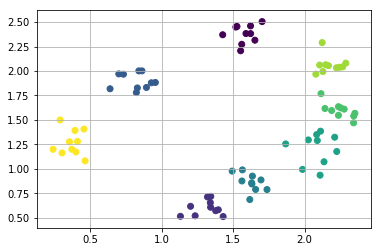

In [12]:
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.grid(True)

In [13]:
from neurolab import net
nn = net.newc([[0, 0.7], [0, 1.5]], 8)
nn.train(x, epochs=500);

Epoch: 100; Error: 14.676263970137812;
Epoch: 200; Error: 12.630433541645564;
Epoch: 300; Error: 12.56014755525386;
Epoch: 400; Error: 12.5701064182957;
Epoch: 500; Error: 12.575862684409717;
The maximum number of train epochs is reached


In [14]:
nn.layers[0].np['w']

array([[0.81016111, 1.89455533],
       [2.07417685, 1.17453452],
       [1.61465419, 0.8590072 ],
       [2.17598734, 1.98341572],
       [1.3000761 , 0.59378826],
       [1.68466901, 2.35878065],
       [0.36545538, 1.27638877],
       [2.23897081, 1.53898389]])

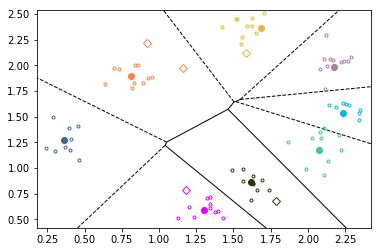

In [125]:
X_test = [[np.random.uniform(0.2, 2.3), np.random.uniform(0.5, 2.5)] for _ in range(5)]
scipy.spatial.voronoi_plot_2d(scipy.spatial.Voronoi(nn.layers[0].np['w']), show_vertices=False)
for i in range(8):
    check = [0] * 8
    check[i] = 1
    check = np.array([check], np.float32)
    plts = np.array([j for j in P if np.array_equal(nn.sim([j]), check)])
    plts2 = np.array([j for j in X_test if np.array_equal(nn.sim([j]), check)])
    clr = np.random.rand(3)
    plt.plot(plts[:, 0], plts[:, 1], '.', fillstyle='none', color=clr)
    plt.plot([x[0] for x in plts2], [x[1] for x in plts2], 'D', fillstyle='none', color=clr)
    plt.plot([nn.layers[0].np['w'][i, 0]], [nn.layers[0].np['w'][i, 1]], 'o', color=clr)

## Задание 2